# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [26]:
#CSV data to dataframe
df_trendingbooks = pd.read_csv('Best-selling books data 2009-2023-1.csv')

In [3]:
df_trendingbooks.head()

,Rank,Title,Author,Ratings,Price,No_of_Reviews,Cover_Type,Year_of_List,Genre
0,1,The Lost Symbol,Dan Brown,4.4,12.49,16118.0,Hardcover,2009,Fiction
1,2,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,13.40,23392.0,Paperback,2009,Fiction
2,3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,9.93,5036.0,Hardcover,2009,Non-Fiction
3,4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,14.30,16912.0,Hardcover,2009,Fiction
4,5,Going Rogue: An American Life,Sarah Palin,4.6,9.99,1572.0,Hardcover,2009,Non-Fiction


## Data cleaning and EDA

In [4]:
# Obtain info and null values
df_trendingbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1487 non-null   int64  
 1   Title          1486 non-null   object 
 2   Author         1486 non-null   object 
 3   Ratings        1484 non-null   float64
 4   Price          1486 non-null   float64
 5   No_of_Reviews  1485 non-null   float64
 6   Cover_Type     1487 non-null   object 
 7   Year_of_List   1487 non-null   int64  
 8   Genre          1487 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 104.7+ KB


In [5]:
#checking the number of null values
df_trendingbooks.isnull().value_counts()

Rank   Title  Author  Ratings  Price  No_of_Reviews  Cover_Type  Year_of_List  Genre
False  False  False   False    False  False          False       False         False    1481
                      True     False  False          False       False         False       2
                      False    True   False          False       False         False       1
                      True     False  True           False       False         False       1
              True    False    False  True           False       False         False       1
       True   False   False    False  False          False       False         False       1
Name: count, dtype: int64

In [6]:
df_trendingbooks.isna().sum()

Rank             0
Title            1
Author           1
Ratings          3
Price            1
No_of_Reviews    2
Cover_Type       0
Year_of_List     0
Genre            0
dtype: int64

In [7]:
#removing columns with no author (is not a book but a game), Title and Price
df_trendingbooks.dropna(subset=['Author', 'Title', 'Price', 'No_of_Reviews'], inplace=True)



In [8]:

#imputing values for rating column with mean
df_trendingbooks['Ratings'] = df_trendingbooks['Ratings'].fillna(df_trendingbooks['Ratings'].mean())


In [9]:
#checking again for null values
df_trendingbooks.isna().sum()

Rank             0
Title            0
Author           0
Ratings          0
Price            0
No_of_Reviews    0
Cover_Type       0
Year_of_List     0
Genre            0
dtype: int64

In [10]:
print("Number of duplicates: " + str(df_trendingbooks.duplicated().sum()))

Number of duplicates: 0


In [11]:
len(df_trendingbooks)

1483

In [12]:
#descriptive statistics
df_trendingbooks.describe()

,Rank,Ratings,Price,No_of_Reviews,Year_of_List
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,50.326365,4.655300,13.563338,30929.088334,2016.006743
std,28.892701,0.193903,9.717877,50420.226631,4.313611
min,1.000000,3.400000,1.170000,1.000000,2009.000000
25%,25.000000,4.600000,8.490000,6769.000000,2012.000000
50%,50.000000,4.700000,11.990000,17292.000000,2016.000000
75%,75.000000,4.800000,16.200000,34955.000000,2020.000000
max,100.000000,5.000000,144.000000,740228.000000,2023.000000


Average book price is around $13.56.
Average rating is 4.66.

In [13]:
# Non-numerical info
df_trendingbooks.describe(include=['O'])

,Title,Author,Cover_Type,Genre
count,1483,1483,1483,1483
unique,865,571,9,2
top,The Four Agreements: A Practical Guide to Pers...,Rick Riordan,Hardcover,Non-Fiction
freq,12,22,725,793


In [14]:
# Top 25 Authors on the best-seller list over the years 2009-2023 (by book count)
s= df_trendingbooks['Author'].value_counts()
s.head(25)

Author
Rick Riordan                          22
Jeff Kinney                           19
Suzanne Collins                       19
John Grisham                          17
Bill Martin Jr.                       16
Dr. Seuss                             14
Gary Chapman                          14
Colleen Hoover                        14
Gallup                                13
American Psychological Association    13
Paulo Coelho                          12
Dav Pilkey                            12
Malcolm Gladwell                      12
The College Board                     11
Don Miguel Ruiz                       11
Eric Carle                            11
Heidi Murkoff                         10
Harper Lee                            10
Adam Wallace                          10
Rob Elliott                           10
Stephen R. Covey                      10
J.K. Rowling                          10
Dale Carnegie                         10
Robert Munsch                         10
Stephenie

The highest number of top-selling books sold by an author are penned by Rick Riordan (Author of Percy Jackson) followed by Jeff Kinney (writer of the Diary of A Wimpy Kid series).

In [15]:
#checking count by genre
s= df_trendingbooks.value_counts('Genre')
s

Genre
Non-Fiction    793
Fiction        690
Name: count, dtype: int64

Non-Fiction outnumbers fiction by 53%.

Word cloud for 2023 data which has sub-categories included. (Not sure if you'd want to keep this or exclude it).

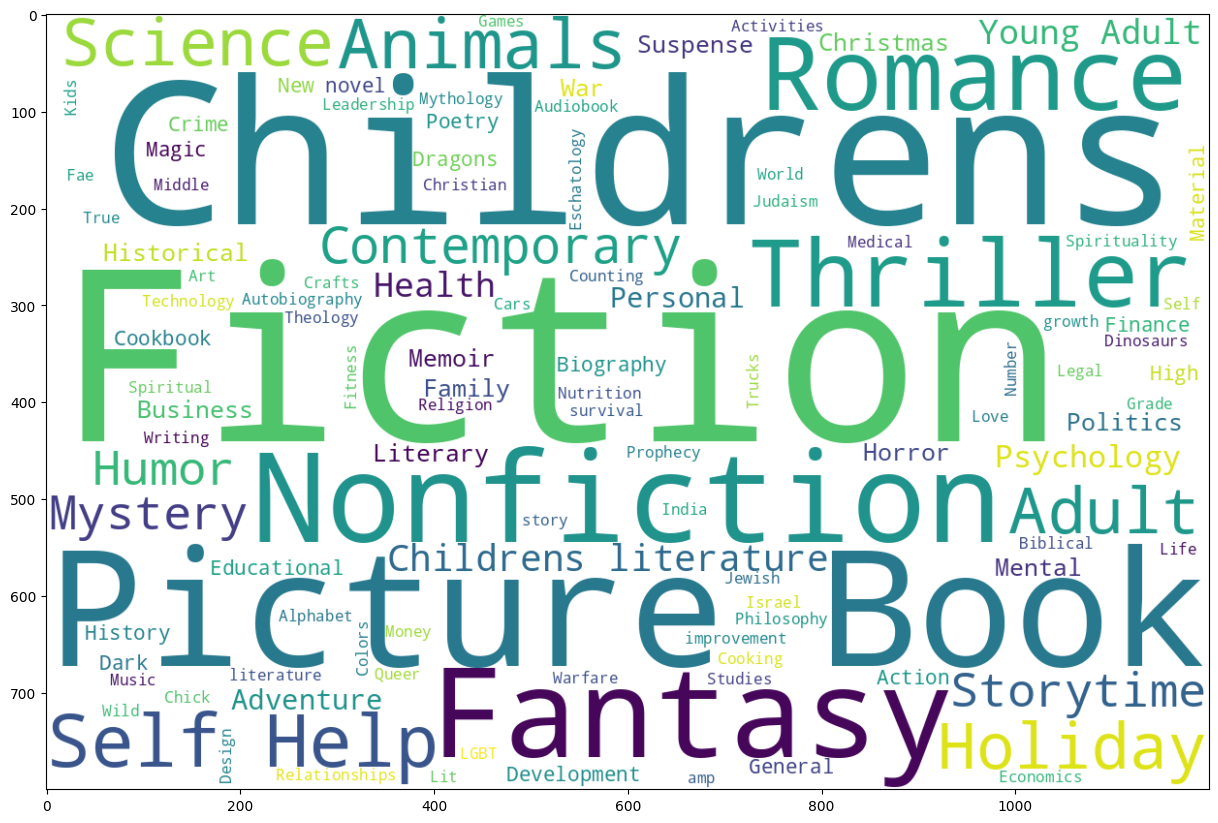

In [31]:
# Wordcloud of book genres

from wordcloud import WordCloud

world = df_trendingbooks.genre[df_trendingbooks.genre.index]

plt.figure(figsize = (15,20))
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800, background_color='white').generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [16]:
#top 10 authors by rating
df_trendingbooks[["Ratings","Author"]].groupby(['Author']).mean().sort_values('Ratings', ascending=False).head(10)

,Ratings
Author,
Michael Connelly,5.0
"duopress labs, Julissa Mora",4.9
Margaret Wise Brown,4.9
Andrea Beaty,4.9
Rush Limbaugh,4.9
Rose Rossner,4.9
Robert Munsch,4.9
Priscilla Shirer,4.9
Pete Souza,4.9


In [17]:
"""
Scoring system for authors based on how many books they have published, and their respective rankings.

For each book an author has in the top 100, their score is the sum of (101 - book_rank).
"""

unique, counts = np.unique(df_trendingbooks['Author'], return_counts = True)
df_authors = pd.DataFrame({
    "Author": unique,
    "count": counts
})
df_authors['Points'] = 0
author_list = []
point_list = []
df_authors.sort_values(by='count', ascending=False, inplace=True)
df_authors.reset_index(inplace=True, drop=True)

# Printing each author with their books in the top 100, along with their score
for index, _ in df_authors.iterrows():
    author = df_authors.at[index, 'Author']
    count = df_authors.at[index, 'count']
    print(f"Author: {author} -> Count = {count}")
    print()
    df_books_author = df_trendingbooks[df_trendingbooks['Author'] == author]
    points = 0
    author_list.append(author)
    for i, _ in df_books_author.iterrows():
        print(f"Book: {df_books_author.at[i, 'Title']} --> Rank = {df_books_author.at[i, 'Rank']}")
        score = 101 - df_books_author.at[i, 'Rank']
        points += score
    df_authors.at[index, 'Points'] = points
    point_list.append(points)
    print()
    print(f"Total points = {points}")
    print()
    print('##########')

Author: Rick Riordan -> Count = 22

Book: The Last Olympian (Percy Jackson and the Olympians, Book 5) --> Rank = 39
Book: The Lost Hero (Heroes of Olympus, Book 1) --> Rank = 25
Book: The Last Olympian (Percy Jackson and the Olympians, Book 5) --> Rank = 36
Book: The Red Pyramid (The Kane Chronicles, Book 1) --> Rank = 42
Book: Percy Jackson and the Olympians Paperback Boxed Set (Books 1-3) --> Rank = 43
Book: The Battle of the Labyrinth (Percy Jackson and the Olympians, Book 4) --> Rank = 67
Book: The Son of Neptune (Heroes of Olympus, Book 2) --> Rank = 14
Book: The Throne of Fire (The Kane Chronicles, Book 2) --> Rank = 36
Book: The Lost Hero (Heroes of Olympus, Book 1) --> Rank = 82
Book: The Mark of Athena (Heroes of Olympus, Book 3) --> Rank = 13
Book: The Serpent's Shadow (The Kane Chronicles, Book 3) --> Rank = 39
Book: The House of Hades (Heroes of Olympus, Book 4) --> Rank = 7
Book: The Blood of Olympus (The Heroes of Olympus, 5) --> Rank = 7
Book: Magnus Chase and the Gods o

In [18]:
# Highest ranking authors based on the scoring system
df_authors.sort_values(by='Points', ascending=False, inplace=True)
df_authors.reset_index(inplace=True, drop=True)
df_authors.head(20)

,Author,count,Points
0,Jeff Kinney,19,1484
1,Suzanne Collins,19,1214
2,Rick Riordan,22,1089
3,Gary Chapman,14,1077
4,Dr. Seuss,14,923
5,Gallup,13,917
6,American Psychological Association,13,887
7,Colleen Hoover,14,845
8,Eric Carle,11,818
9,Don Miguel Ruiz,11,804


Analysis of books written by the most successful authors could give insight into what makes a book successful.

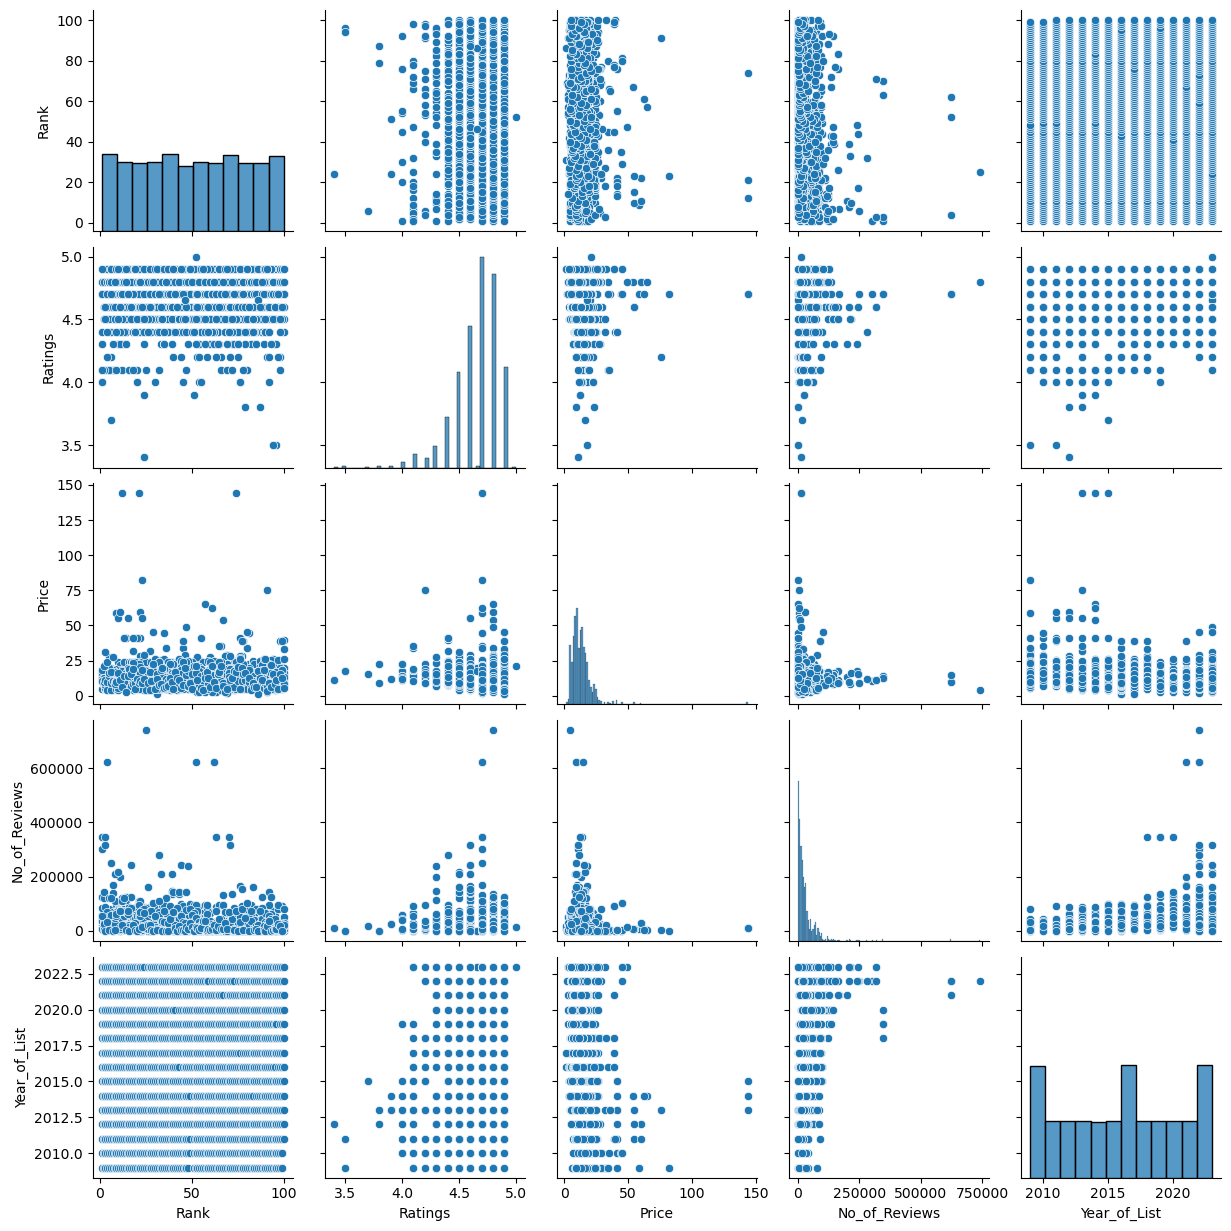

In [19]:
#checking the relationship, strength and direaction of correlations (if any)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df_trendingbooks)
plt.show()

From the pairplot above, I can't deduce if there is a strong linear relationship between any of the variables. 

<Axes: >

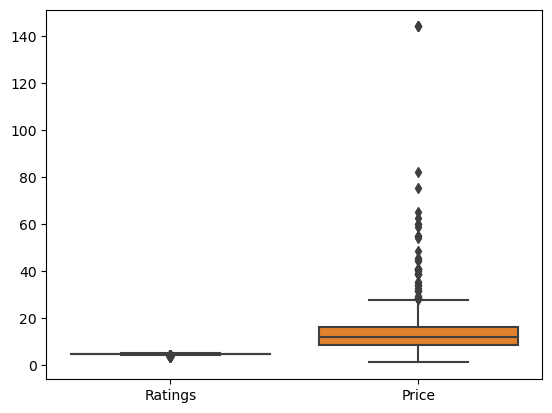

In [25]:
#checking for outliers in data

z= df_trendingbooks.iloc[::,3:5]
sns.boxplot (data= z)


There are likely two outliers in terms of book pricing. I will not be removing these data points from my model as we want to study the relationship between book prices and the rating provided by reviewers. 

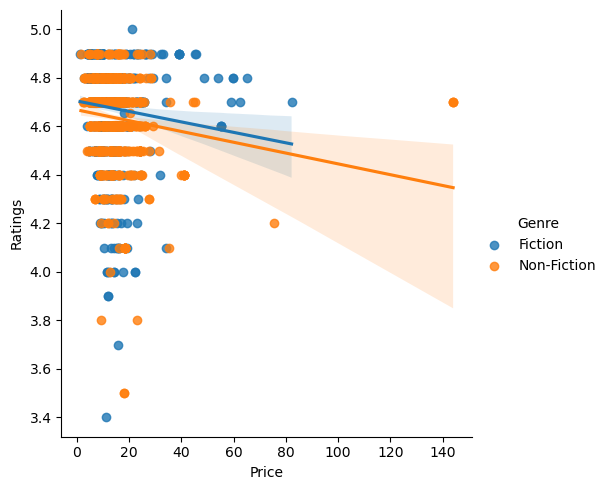

In [79]:
sns.lmplot(data=df_trendingbooks, x="Price", y="Ratings", hue = 'Genre')

In [22]:
df_trendingbooks.to_csv('Bestselling_Books_clean.csv', index = False)

## Linear Regression

In [80]:
import statsmodels.api as sm
y = df_trendingbooks['Ratings']
X = df_trendingbooks['Price']
X = sm.add_constant(X) #adding constant
X.head()

,const,Price
0,1.0,12.49
1,1.0,13.40
2,1.0,9.93
3,1.0,14.30
4,1.0,9.99


In [81]:
model = sm.OLS(y, X)
results = model.fit() #fit the model 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     21.16
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.59e-06
Time:                        15:03:57   Log-Likelihood:                 339.44
No. Observations:                1483   AIC:                            -674.9
Df Residuals:                    1481   BIC:                            -664.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6874      0.009    545.749      0.0

R-squared of 0.014 suggests that only about 1.4% of the variance in the dependent variable is explained by the model independent variable included in the model. The relationship between Price and Rating seems to be weak and non-linear. . A p-value of 0.0 is indicative of a statistically significant relationship, but a low R-squared suggests that the model might not be explaining a substantial portion of the variance in the dependent variable.

## Multivariate Regression

In [129]:
import statsmodels.api as sm
y = df_trendingbooks['Ratings']
X = df_trendingbooks[['Price','No_of_Reviews']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept, bias
X.head()

,const,Price,No_of_Reviews
0,1.0,12.49,16118.0
1,1.0,13.40,23392.0
2,1.0,9.93,5036.0
3,1.0,14.30,16912.0
4,1.0,9.99,1572.0


In [130]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.16e-06
Time:                        15:26:49   Log-Likelihood:                 342.61
No. Observations:                1483   AIC:                            -679.2
Df Residuals:                    1480   BIC:                            -663.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6781      0.009    500.717

The model's R-square has improved slightly for 1.4% to 1.8%. The P-values for Price and No_of_Reviews are still below 0.05 which means the relationship is statistically significant, however, the R-squared is still relatively low. The Notes suggest there might be multicollinearity problems.

In [ ]:
import statsmodels.api as sm
y = df_trendingbooks['Ratings']
X = df_trendingbooks[['Price','No_of_Reviews']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept, bias
X.head()

## Logistic Regression

In [134]:
#converting genre to numerical 

from sklearn.preprocessing import LabelEncoder

df2 = df_trendingbooks.copy(deep = True)
Genre= LabelEncoder()
df2['Genre'] = genre.fit_transform(df_trendingbooks['Genre'])
df2

,Rank,Title,Author,Ratings,Price,No_of_Reviews,Cover_Type,Year_of_List,Genre
0,1,The Lost Symbol,Dan Brown,4.4,12.49,16118.0,Hardcover,2009,0
1,2,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.7,13.40,23392.0,Paperback,2009,0
2,3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,4.8,9.93,5036.0,Hardcover,2009,1
3,4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.7,14.30,16912.0,Hardcover,2009,0
4,5,Going Rogue: An American Life,Sarah Palin,4.6,9.99,1572.0,Hardcover,2009,1
...,...,...,...,...,...,...,...,...,...
1482,96,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,4.7,11.40,6663.0,Paperback,2023,1
1483,97,Hatchet,Gary Paulsen,4.7,5.14,24713.0,Paperback,2023,0
1484,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann,4.5,15.30,16785.0,Hardcover,2023,1
1485,99,"I'm Dead, Now What?: Important Information Abo...",Peter Pauper Press,4.6,12.99,2.0,Paperback,2023,1


In [138]:
import warnings
warnings.filterwarnings('ignore')


y = df2['Genre']
X= df_trendingbooks[['Ratings', 'Price']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept



In [139]:
model = sm.Logit(y.astype(float),X.astype(float)) # (need to send in as floats)

results = model.fit() #fit the model (MLE)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.681934
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Genre   No. Observations:                 1483
Model:                          Logit   Df Residuals:                     1480
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.01274
Time:                        15:33:49   Log-Likelihood:                -1011.3
converged:                       True   LL-Null:                       -1024.4
Covariance Type:            nonrobust   LLR p-value:                 2.153e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6798      1.341      3.489      0.000       2.051       7.309
Ratings       -1.0276      0.

Trying a different approach.

In [177]:

df_trendingbooks.loc[df_trendingbooks['Genre'] == 'Fiction', 'Genre'] = 1
df_trendingbooks.loc[df_trendingbooks['Genre'] == 'Non-Fiction', 'Genre'] = 0

df_trendingbooks['Genre'].value_counts()

Genre
0    793
1    690
Name: count, dtype: int64

In [179]:
y = df_trendingbooks['Genre']
X = df_trendingbooks[['Ratings', 'Price']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y.astype(float),X.astype(float)) # (need to send in as floats)

results = model.fit() #fit the model (MLE)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.681934
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Genre   No. Observations:                 1483
Model:                          Logit   Df Residuals:                     1480
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.01274
Time:                        16:42:28   Log-Likelihood:                -1011.3
converged:                       True   LL-Null:                       -1024.4
Covariance Type:            nonrobust   LLR p-value:                 2.153e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6798      1.341     -3.489      0.000      -7.309      -2.051
Ratings        1.0276      0.

"Genre" is a binary categorical variable here with values 0 (Non-Fiction) and 1 (Fiction). Const (-4.6798) is the log odds of the baseline category Non-Fiction when all predictors are zero. 
A one unit increae in rating could increase 1.0276 in the log-odds of book being Fiction compared to it being Non-Fiction. Alternatively, a unit increase in price is linked with the decrease of 0.0183 in the log odds of the book being Fiction as opposed to Non-Fiction.
P-value lower than 0.05 percent suggests that the model is still statistically significant. The LLR P-value is extremely small which provides evidence against the null hypothesis. This means that the dependent variables in the model provide statistically significant information in predicting dependent vraiable compared to a model with no predictors however the low R-squared value of 0.01274 might indicate that including other dependent variables could improve the model. 
From my research on Pseudo R square it seems that unlike ordinary least square-R2, log-likelihood-based pseudo-R2s do not represent the proportion of explained variance but rather the improvement in model likelihood over a null model. I am not sure how to interpret the Pseudo R square value here but it seems small and thereby I have concluded that there might be other factors influencing the dependent variables that I may not have taken into account. 